In [70]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [71]:
path = 'training_data/2020_05_04/host/'
df = pd.read_csv(path+"host_data_full.csv")

In [72]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [73]:
df = df[(df['timestamp']>= 1588542600000)&(df['timestamp']< 1588543260000)]

In [74]:
# We get a list of hosts from the previous step (here it's manual)
# hosts = df['cmdb_id'].unique()
hosts = ['docker_001', 'docker_002', 'docker_004', 'docker_008']

In [75]:
# itemid,name,bomc_id,timestamp,value,cmdb_id
grouped_by_host = df[df['cmdb_id'].isin(hosts)].groupby('cmdb_id')[['name', 'value']]

In [78]:
from sklearn.neighbors import KernelDensity
from sklearn import preprocessing

anomalies = {}

def find_outlier(values):
    X = np.reshape(values,(-1,1))
    kde = KernelDensity(kernel='gaussian', bandwidth=1.0).fit(X)
    yvals = kde.score_samples(X)
    outliers = np.where(yvals < np.percentile(yvals, 1))[0]
    return outliers

for host, item in grouped_by_host:
    df_1 = grouped_by_host.get_group(host)
    grouped_by_name = df_1.groupby('name')['value'].apply(list).reset_index(name='values')
    print("Host %s has %d names"%(host, len(grouped_by_name)))
    for i in range(len(grouped_by_name)):
        row = grouped_by_name.iloc[i]
        name = row['name']
        values = row['values']
        outliers = find_outlier(values)
        if (len(outliers)):
            anomalies[host+" ---> "+name] = outliers

print("done")

Host docker_001 has 9 names
Host docker_002 has 9 names
Host docker_004 has 9 names
Host docker_008 has 9 names
done


In [79]:
len(anomalies)

2

In [56]:
df_2 = grouped_by_host.get_group('docker_002')
grouped_by_name = df_2.groupby('name')['value'].apply(list).reset_index(name='values')

Host docker_001 has 9 names


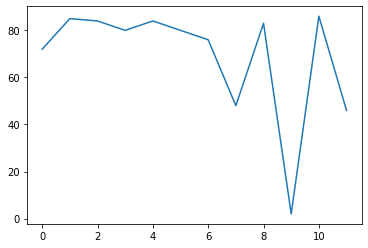

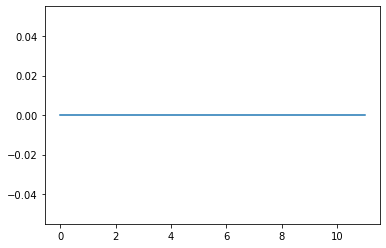

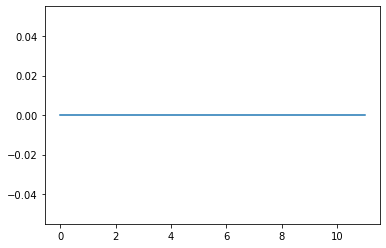

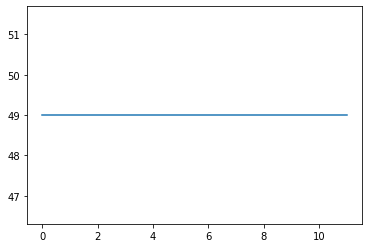

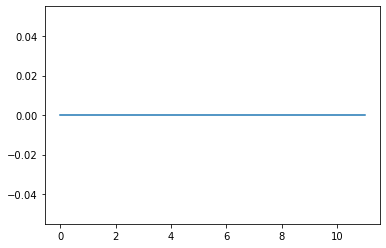

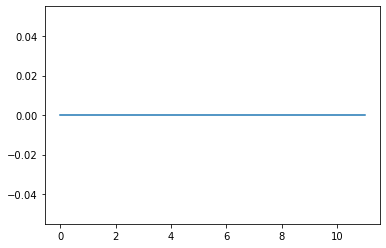

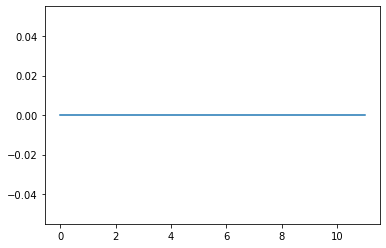

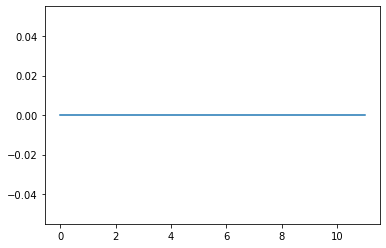

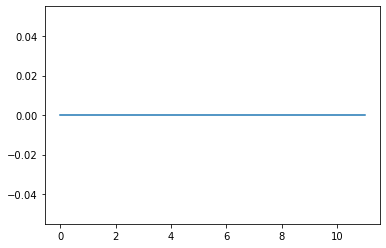

Host docker_002 has 9 names


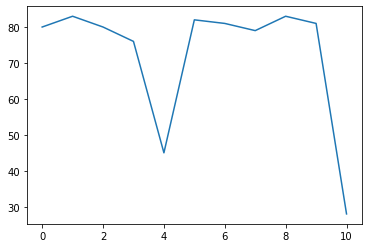

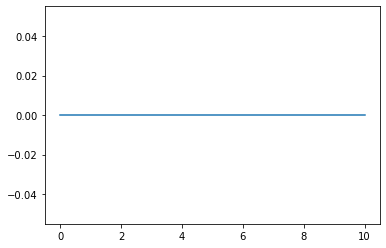

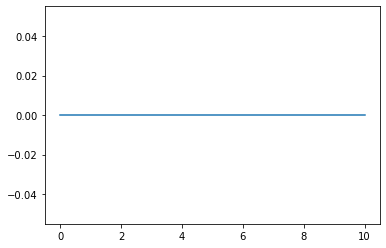

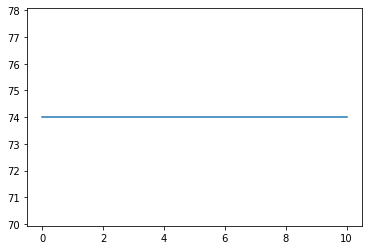

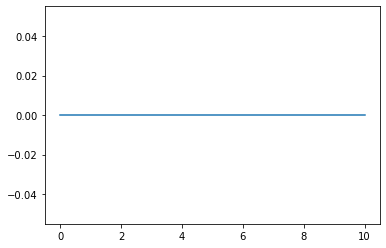

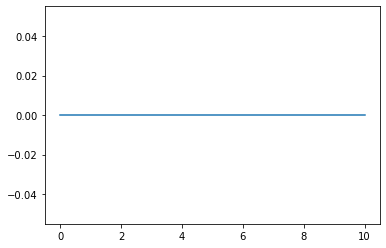

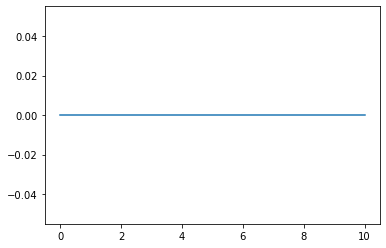

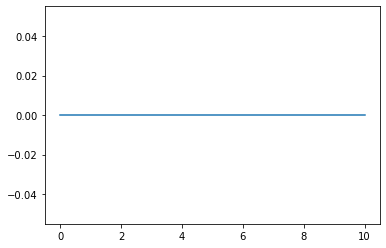

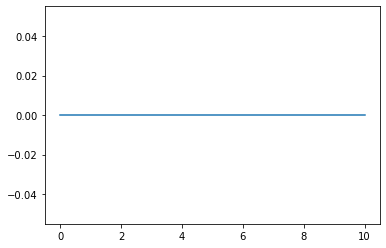

Host docker_004 has 9 names


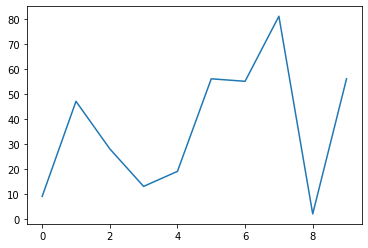

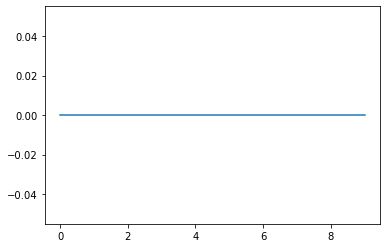

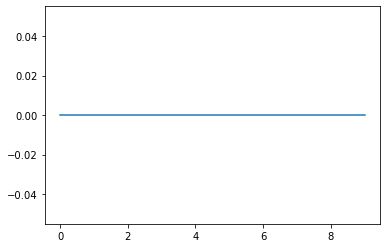

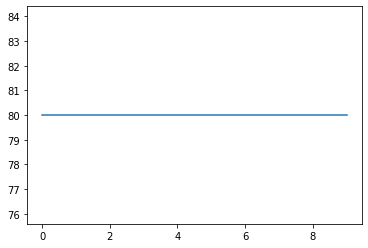

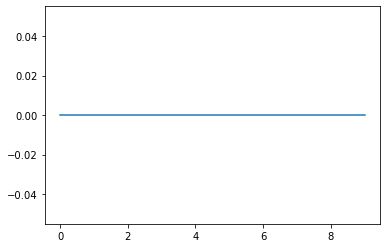

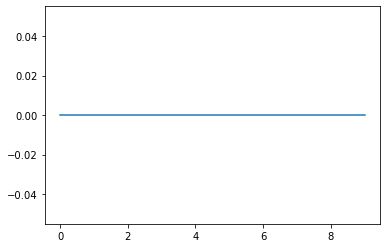

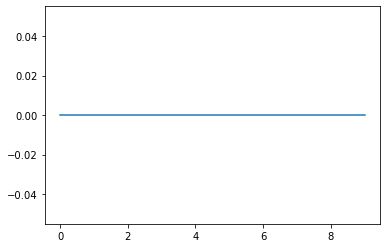

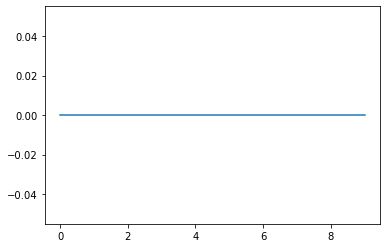

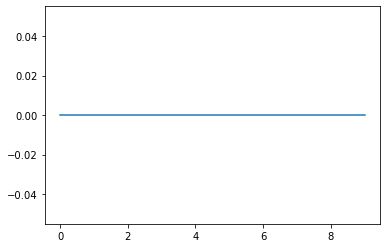

Host docker_008 has 9 names


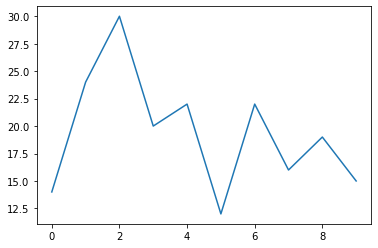

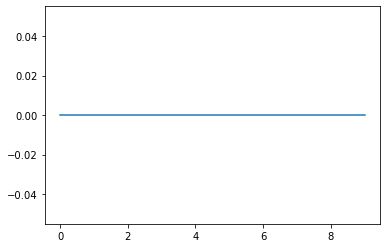

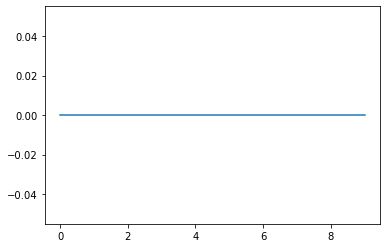

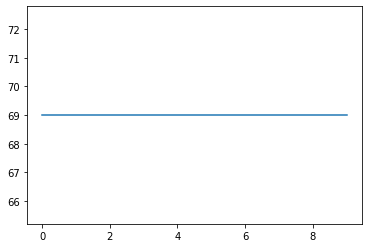

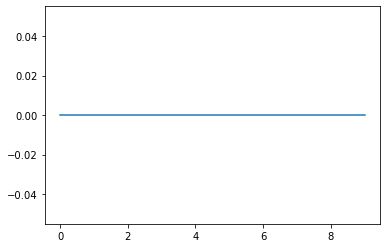

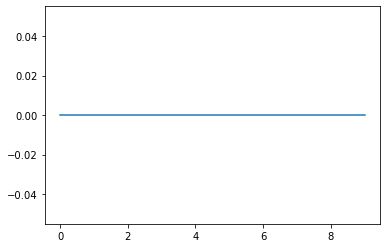

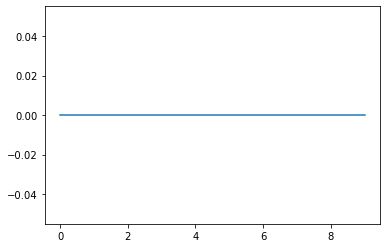

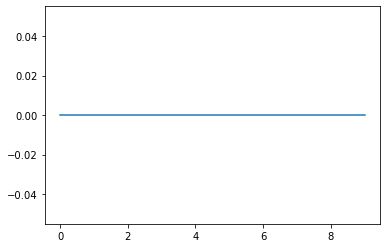

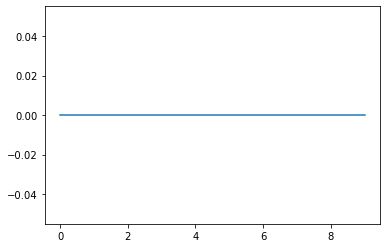

In [77]:
for host, item in grouped_by_host:
    df_1 = grouped_by_host.get_group(host)
    grouped_by_name = df_1.groupby('name')['value'].apply(list).reset_index(name='values')
    print("Host %s has %d names"%(host, len(grouped_by_name)))
    for i in range(len(grouped_by_name)):
        row = grouped_by_name.iloc[i]
        name = row['name']
        values = row['values']
        plt.figure()
        plt.plot(values)
        plt.show()

In [67]:
anoms = {}
def find_anomalies():
    for i in range(len(grouped_by_name)):
        row = grouped_by_name.iloc[i]
        name = row['name']
        values = row['values']
        outliers = find_outlier(values)
        if (len(outliers)):
            anoms["docker_002"+" ---> "+name] = outliers
    return anoms

anom = find_anomalies()

In [68]:
anom

{}